In [119]:
# imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.neural_network import MLPRegressor

In [120]:
# loads dataset
df = pd.read_csv("../data/challenge/train.csv")
df2 = pd.read_csv("../data/challenge/additive.csv")

#adds columns
df["cap"] = df2["CAPTC_DIA"]
df["resg"] = df2["RESG_DIA"]
df.drop(["Fluxo"],inplace=True,axis=1)

In [121]:
df = df.drop(["DT_COMPTC"], axis=1)
def lock_lim(df):
    cols = df.columns
    for col in cols:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        ls = q3 + 1.5*iqr
        li = q1 - 1.5*iqr
        df[col][df[col] < li] = li
        df[col][df[col] > ls] = ls
    
    return df

print(df.describe())
df = lock_lim(df)
print(df.describe())

                IBOV          Dol           NDX          SPX          cap  \
count    4121.000000  4121.000000   4121.000000  4121.000000  4121.000000   
mean    62282.093351     2.760941   4095.586794  1865.906190   261.791485   
std     21609.810010     1.068885   2922.936009   759.751023   360.429976   
min     23610.000000     1.539100   1036.510000   676.530000     0.000000   
25%     49353.000000     1.944200   1840.670000  1271.510000    81.651000   
50%     58393.900000     2.305400   2807.300000  1554.520000   139.446000   
75%     69729.300000     3.381800   5508.030000  2378.250000   275.322000   
max    125076.600000     5.886000  14041.910000  4232.600000  5666.407000   

               resg  
count   4121.000000  
mean     216.305305  
std      782.991324  
min        0.000000  
25%       82.931000  
50%      134.265000  
75%      215.572000  
max    44746.630000  
                IBOV          Dol           NDX          SPX          cap  \
count    4121.000000  4121.0000

In [122]:
# data_train = df[["DT_COMPTC"]][:3000]

#dados de treino
X_train = df.drop(["cap","resg"],axis=1)[:3000]
y_train = df[["cap"]][:3000]

#dados de teste
X_test = df.drop(["cap","resg"],axis=1)[3000:]
y_test = df[["cap"]][3000:]

In [123]:
# data_train = df[["DT_COMPTC"]][:3000]

#dados de treino
X_train2 = df.drop(["resg","cap"],axis=1)[:3000]
y_train2 = df[["resg"]][:3000]

#dados de teste
X_test2 = df.drop(["resg","cap"],axis=1)[3000:]
y_test2 = df[["resg"]][3000:]

In [124]:
#padroniza os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
# y_test = scaler.fit_transform(y_test)

In [125]:
#padroniza os dados
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
# y_train = scaler.fit_transform(y_train)
X_test2 = scaler.fit_transform(X_test)
# y_test = scaler.fit_transform(y_test)

In [126]:
# tscv = TimeSeriesSplit()
# model = MLPRegressor(activation= 'relu',
#  early_stopping= True,
#  shuffle= True,
#  solver= "adam")
tscv = TimeSeriesSplit()
model = MLPRegressor(activation= 'identity',
 alpha = 0.001,
 early_stopping= True,
 shuffle= False,
 solver= "lbfgs")


model.fit(X_train,y_train)



c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='identity', alpha=0.001, early_stopping=True,
             shuffle=False, solver='lbfgs')

In [127]:
model.predict(X_test)

array([ 51.77366128,  44.82358219,  46.56216228, ..., 246.0542721 ,
       245.9936418 , 246.20980199])

In [128]:
cv_results = cross_val_score(model,X_train,y_train,cv=5,scoring=make_scorer(mean_squared_error))


print(cv_results)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Pyt

[17180.74151722 14556.16573297 15428.07315124 13223.71066407
  7103.82335562]


In [129]:
# tscv = TimeSeriesSplit()
model2a = MLPRegressor(activation= 'relu',
 early_stopping= True,
 shuffle= True,
 solver= "adam",
 max_iter=500)

tscv = TimeSeriesSplit()
model2b = MLPRegressor(activation= 'identity',
 alpha = 0.001,
 early_stopping= True,
 shuffle= False,
 solver= "lbfgs",
 max_iter=500)

# model2.fit(X_train2,y_train2)

cv_results_a = cross_val_score(model2a,X_train2,y_train2.values.ravel(),cv=5,scoring=make_scorer(mean_squared_error))
print(f"Modelo A: {np.mean(cv_results_a)} ± {np.std(cv_results_a)}")
cv_results_b = cross_val_score(model2b,X_train2,y_train2.values.ravel(),cv=5,scoring=make_scorer(mean_squared_error))
print(f"Modelo B: {np.mean(cv_results_b)} ± {np.std(cv_results_b)}")

model2 = model2b #pra n dar erro com o código de baixo

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and 

Modelo A: 8991.667032062385 ± 1837.0691602440963
Modelo B: 9677.143993883774 ± 2760.3404536732087


In [130]:
model2.fit(X_train2,y_train2)
pred = model2.predict(X_test2)
model2.score(X_test2,y_test2)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.7687773329332654

In [131]:
cv_results = cross_val_score(model2,X_train2,y_train2,cv=5,scoring=make_scorer(mean_squared_error))


print(cv_results)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Pyt

[14193.43232219 10636.0836657   6913.73176636  6667.22326915
  9975.68547827]


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
df3 = pd.read_csv("../data/challenge/test.csv")
X_test = df3.drop(["DT_COMPTC"],axis=1)
X_test = lock_lim(X_test)

In [133]:
X_test = scaler.fit_transform(X_test)

In [134]:
df3["cap"] = model.predict(X_test)
df3["resg"] = model2.predict(X_test)

In [135]:
df3["Fluxo"] = df3["cap"] - df3["resg"]

In [136]:
df3

,DT_COMPTC,IBOV,Dol,NDX,SPX,cap,resg,Fluxo
0,2021-05-19,122636.30,5.3105,13237.91,4115.68,204.258043,137.415819,66.842223
1,2021-05-20,122700.80,5.2846,13494.09,4159.12,200.622475,142.430794,58.191681
2,2021-05-21,122592.50,5.3662,13411.74,4155.86,205.716300,139.097945,66.618355
3,2021-05-24,124031.60,5.3185,13641.75,4197.05,211.583712,148.323897,63.259815
4,2021-05-25,122987.70,5.3320,13657.73,4188.13,201.127082,144.788218,56.338864
...,...,...,...,...,...,...,...,...
295,2022-07-20,98286.83,5.4704,12439.68,3959.90,57.072114,48.590664,8.481451
296,2022-07-21,99033.17,5.4988,12619.41,3998.95,62.385983,53.286650,9.099333
297,2022-07-22,98924.82,5.4976,12396.47,3961.63,65.058130,49.383821,15.674309
298,2022-07-25,100269.85,5.3589,12328.41,3966.84,78.163039,56.277664,21.885376


In [137]:
df4 = df3[["DT_COMPTC","Fluxo"]]

In [138]:
df4.to_csv("../organização/submission.csv", index=False)

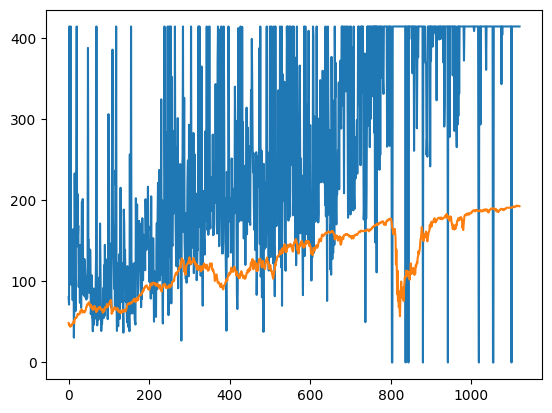

In [139]:
plt.plot(np.arange(len(y_test2)),y_test2)
plt.plot(np.arange(len(y_test2)),pred)